In [196]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder


In [291]:
#Import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape , test.shape 

((1460, 81), (1459, 80))

In [193]:
train.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
195,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,0.598513
143,20,RL,78.0,10335,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,0.600158
1328,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,0.601299
126,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,0.597723
997,20,RL,NaN,11717,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,0.599658
833,20,RL,100.0,10004,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,0.599128
1163,90,RL,60.0,12900,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2008,WD,Alloca,0.596851
482,70,RM,50.0,2500,Pave,Pave,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,0.598738
207,20,RL,NaN,12493,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,4,2008,WD,Normal,0.598239
149,50,RM,NaN,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,0.597145


<AxesSubplot:>

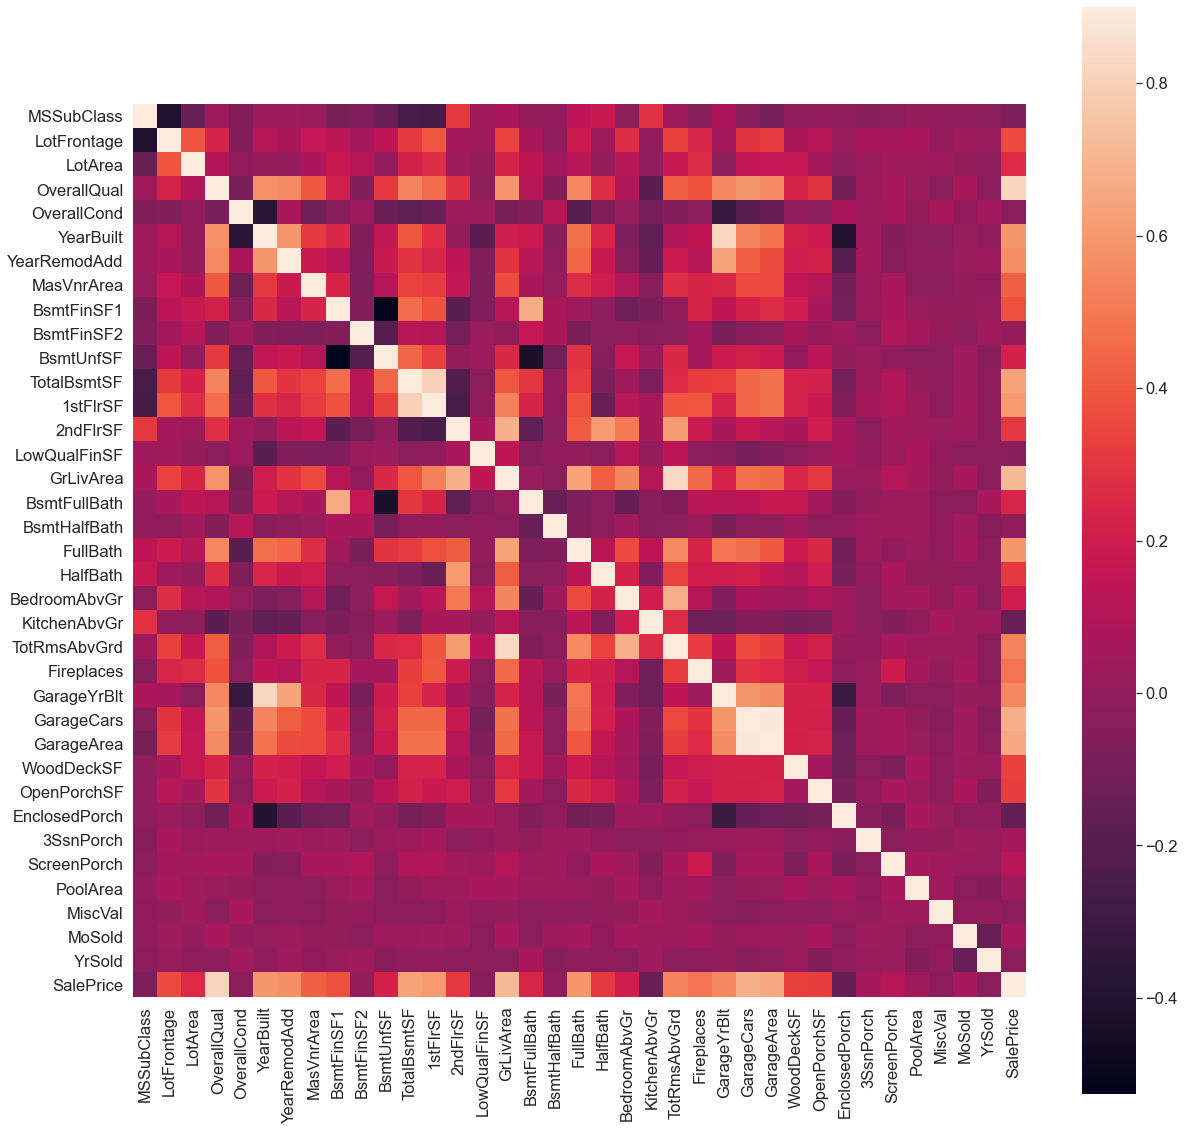

In [144]:
#heatmap to get a sense of correlations
sns.heatmap(train.corr(), vmax=0.9, square=True)

- GarageCars seems perfectly correlated with GarageArea, we can drop GarageCars
- YearBuilt is highly correlated with GarageYrBuilt, which is also correlated with YearRemodAdd
       -we can drop GarageYrBuilt
- GrLivArea is highly correlated with TotRmsAbvGrd, we can drop TotRmsAbvGrd
- TotalBsmtSF is highly correlated with 1stFlSF
- BsmtFinSF1 is correlated with BsmtFullBath

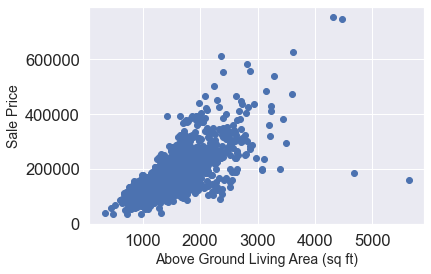

In [292]:
#Data Cleaning

#Plot sale price against GrLivAreab
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('Sale Price', fontsize=14)
plt.xlabel('Above Ground Living Area (sq ft)', fontsize=14)
plt.show()

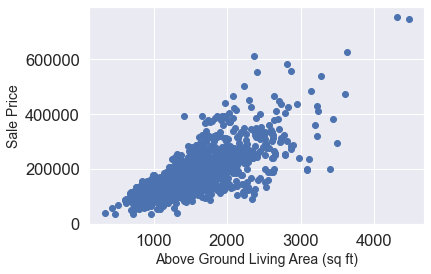

In [293]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<250000)].index)
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('Sale Price', fontsize=14)
plt.xlabel('Above Ground Living Area (sq ft)', fontsize=14)
plt.show()

In [294]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

In [295]:
#Remove 'Id' from the train and test sets
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape , test.shape

((1458, 80), (1459, 79))

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

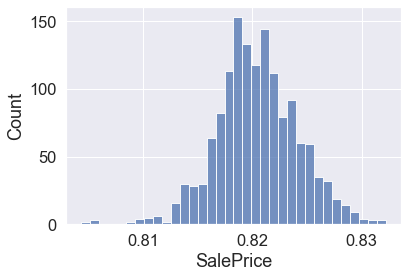

In [78]:
#Plot sale price
sns.histplot(train['SalePrice'])

#The plot shows a right skew- we will apply a log transformation to normalize the distribution

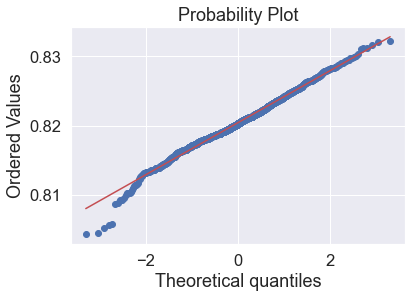

In [79]:
#QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

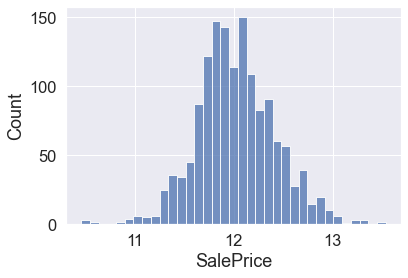

In [296]:
#Apply log transformation to sale price
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.histplot(train['SalePrice'])

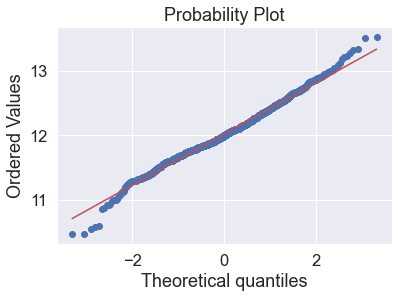

In [357]:
#QQ-plot after log transformation
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

y_train = train['SalePrice']

In [359]:
#Create a combined dataset
combined = pd.concat([train,test], axis=0, sort=False)
combined.drop(['SalePrice'], axis=1, inplace=True)

#Drop redundant columns (as determined by correlation heatmap)
combined = combined.drop(columns=['GarageCars','GarageYrBlt','TotRmsAbvGrd'])
combined.shape

(2917, 76)

In [185]:
#Missing values
combined_na = (combined.isnull().sum() / len(combined)).sort_values(ascending=False)

na_ratios = pd.DataFrame({'Ratio of Missing Values' :combined_na})

#Show all columns that contain missing values
na_ratios[na_ratios['Ratio of Missing Values']>0]

,Ratio of Missing Values
PoolQC,0.997256
MiscFeature,0.963979
Alley,0.932075
Fence,0.804460
FireplaceQu,0.487136
LotFrontage,0.166724
GarageQual,0.054545
GarageCond,0.054545
GarageFinish,0.054545
GarageType,0.053859


In [263]:
#Fill NAs as "None" where appropriate based on documentation
none_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
             'MasVnrType']

combined[none_cols] = combined[none_cols].fillna('None')

#Fill zeros for numerical NAs
zero_cols = ['GarageArea',
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
            'MasVnrArea']

combined[zero_cols]=combined[zero_cols].fillna(0)

In [204]:
#Lot Frontage: does this correlate to Lot Area? It the correlation is high, we will drop LotFrontage
from scipy.stats import pearsonr
lot_compare = combined[combined['LotFrontage'].notna()]

corr, _ = pearsonr(lot_compare['LotFrontage'], lot_compare['LotArea'])
print('Pearsons correlation of lot area and lot frontage: %.3f' % corr)

Pearsons correlation of lot area and lot frontage: 0.370


In [300]:
#Impute median neighhborhood LotFrontage instead of dropping it
combined['LotFrontage'] = combined.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
combined['LotFrontage'].isnull().sum()

0

In [299]:
#Impute mode for categorical missing values
combined['MSZoning'] = combined['MSZoning'].fillna(combined['MSZoning'].mode()[0])
combined['Electrical'] = combined['Electrical'].fillna(combined['Electrical'].mode()[0])
combined['KitchenQual'] = combined['KitchenQual'].fillna(combined['KitchenQual'].mode()[0])
combined['Exterior1st'] = combined['Exterior1st'].fillna(combined['Exterior1st'].mode()[0])
combined['Exterior2nd'] = combined['Exterior2nd'].fillna(combined['Exterior2nd'].mode()[0])
combined['SaleType'] = combined['SaleType'].fillna(combined['SaleType'].mode()[0])
combined['Functional'] = combined['Functional'].fillna(combined['Functional'].mode()[0])

In [298]:
#Dropping Utilities
combined['Utilities'].value_counts()
train['Utilities'].value_counts()
#All values are the same except for one from the train set, so we will drop this variable
combined = combined.drop(['Utilities'], axis=1)

combined.isnull().sum().sum()

13796

Text(0.5, 1.0, 'Features Correlating with Sale Price')

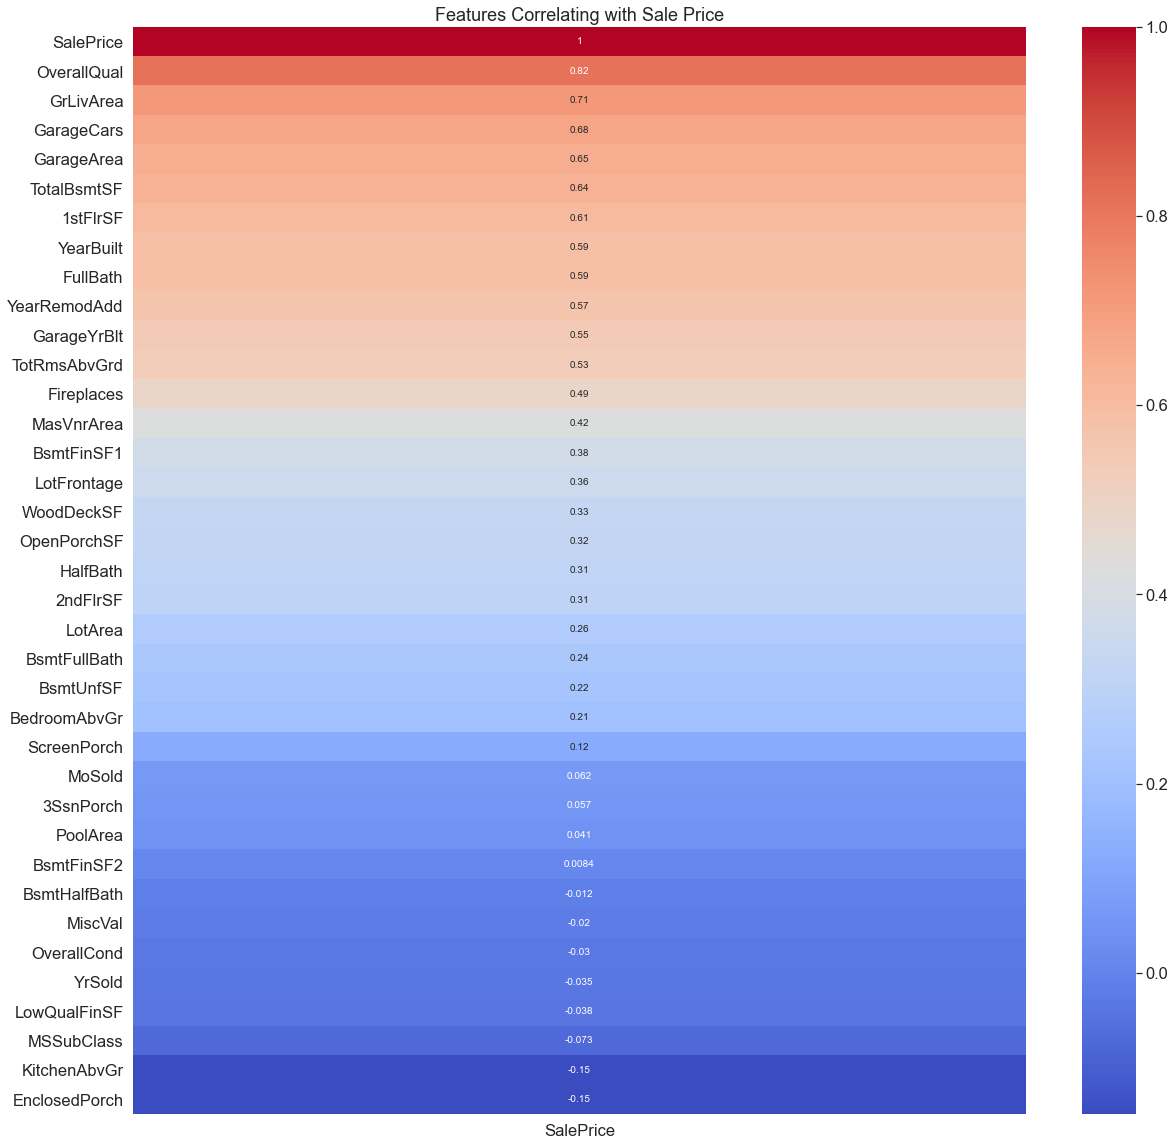

In [97]:
#Heatmap of variables with the highest correlation to sale price
sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True, cmap='coolwarm').set_title('Features Correlating with Sale Price', fontdict={'fontsize':18})

In [325]:
import datetime
#Converting MSSubClass from numeric to category
combined['MSSubClass']=combined['MSSubClass'].astype("str")

#Converting month and year to date format and combining
combined['YrMoSold'] = pd.to_datetime(combined['YrSold'].astype(str) + '/' + combined['MoSold'].astype(str))

dtype('<M8[ns]')

In [320]:
combined.MSSubClass.dtype 

dtype('O')

In [301]:
#Feature Engineering

#total bathrooms
combined['Bathrooms']= combined['FullBath']+(combined['HalfBath']*.5)+combined['BsmtFullBath']+(combined['BsmtHalfBath']*.5)

# total above ground sq footage (note basements are typically not allowed to be included in real estate sq footage)
combined['AboveGrSF']= combined['1stFlrSF']+combined['2ndFlrSF']

#total porch sq ft
combined['PorchSF']= combined['OpenPorchSF']+combined['EnclosedPorch']+combined['3SsnPorch']+combined['ScreenPorch']

#basement square feet
combined2['BsmtFinSF']= combined2['BsmtFinType1']*combined2['BsmtFinSF1']+combined2['BsmtFinType2']*combined2['BsmtFinSF2']
#drop BsmtUnfSF and TotalBsmtSF

In [328]:
#Drop columns used in calculating new columns
combined = combined.drop(columns=['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath',
                                 '1stFlrSF','1stFlrSF',
                                 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
                                 'MoSold','YrSold'])
combined2 = combined2.drop(columns=['BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2'])

In [347]:
#Identify variables with high skew levels
skewed = combined.skew(axis=0).sort_values(ascending=False)

high_skew = skewed[skewed > 0.5]
high_skew

MiscVal         21.950962
LotArea         13.116240
KitchenAbvGr     4.302763
BsmtFinSF2       4.145816
MasVnrArea       2.610712
PorchSF          2.245655
WoodDeckSF       1.845741
MSSubClass       1.375838
LotFrontage      1.103606
GrLivArea        1.069300
AboveGrSF        1.046594
BsmtFinSF1       0.980788
BsmtUnfSF        0.920173
2ndFlrSF         0.861999
Fireplaces       0.725651
TotalBsmtSF      0.676548
OverallCond      0.569607
dtype: float64

In [343]:
#drop LowQualFinSF(overwhelmingly 0), PoolArea(this is redundant with PoolQuality)
combined = combined.drop(columns=['LowQualFinSF','PoolArea'])

In [351]:
#Log transformation of skewed numerical features
for feat in high_skew.index:
    combined[feat] = np.log1p(combined[feat].astype(float))

In [354]:
# Mapping some ordinal categorical variables that contain information in their ordering set to integers for linear models
combined2 = combined.copy()

combined2 = combined.replace({
    'ExterQual':quality, 'ExterCond':quality,
    'BsmtQual':quality, 'BsmtCond':quality,
    'BsmtExposure':{'Gd':4, 'Av':3, 'Mn':2, 'No':1 , 'NA':0},
    #Basement average rec room coded equivalent to average living quarters
    'BsmtFinType1':{'GLQ':5, 'ALQ':4, 'BLQ':3, 'Rec':4, 'LwQ':2, 'Unf':1, 'None':0},
    'BsmtFinType2':{'GLQ':5, 'ALQ':4, 'BLQ':3, 'Rec':4, 'LwQ':2, 'Unf':1, 'None':0},
    'HeatingQC': quality, 'CentralAir': {'No':0, 'Yes':1},
    'KitchenQual': quality,
    'Functional':{'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0},
    'FireplaceQu' : quality,
    'GarageFinish':{'Fin':3, 'RFn':2, 'Unf':1, 'NA':0},
    'GarageQual' :quality, 'GarageCond' :quality,
    'PavedDrive' :{'Y':2, 'P':1, 'N':0},
    'PoolQC' : quality,
})
#Dummify remaining categorical variables (non-ordinal)
combined2 = pd.get_dummies(combined2)
combined2.shape

(2917, 216)

In [361]:
#Re-split data into train and test
x_train = combined2[:len(y_train)]
x_test = combined2[len(y_train):]
x_train.shape, x_test.shape

((1458, 216), (1459, 216))

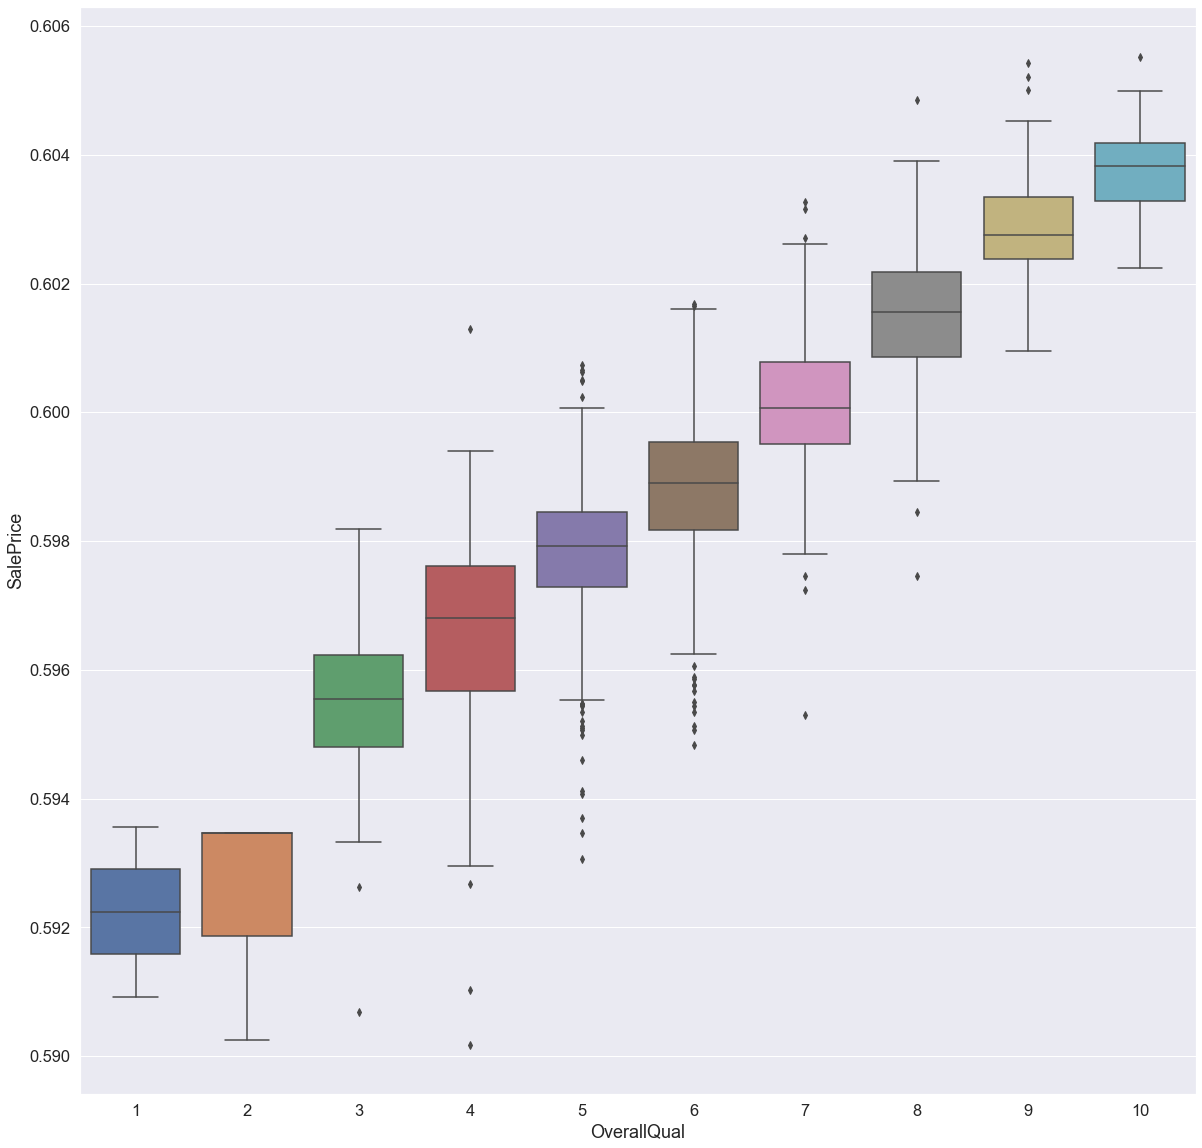

In [117]:
#Examine Overall Quality
ax = sns.boxplot(x="OverallQual", y="SalePrice", data=train)

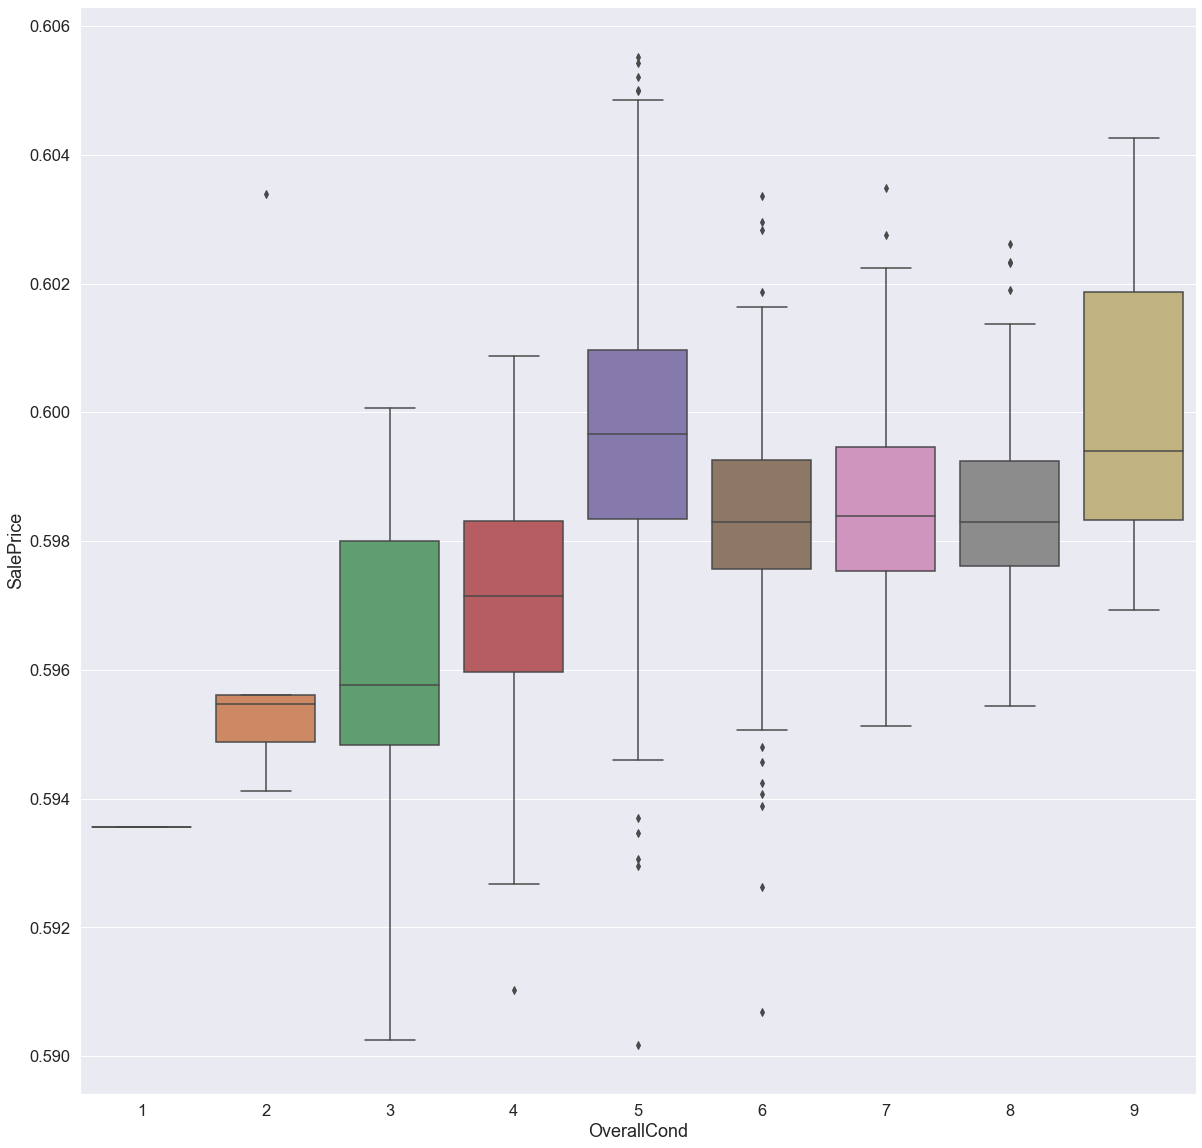

In [118]:
# Overall Condition
ax = sns.boxplot(x="OverallCond", y="SalePrice", data=train)

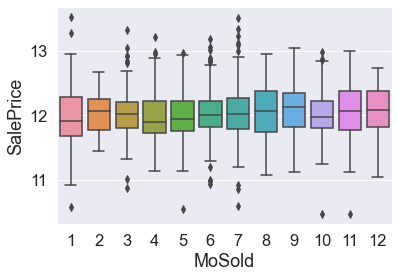

In [316]:
ax = sns.boxplot(x="MoSold", y="SalePrice", data=train)

In [276]:
combined.SaleCondition.value_counts()


Normal     2401
Partial     243
Abnorml     189
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

1    2783
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

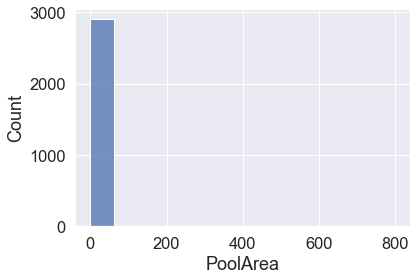

In [342]:
sns.histplot(combined['PoolArea'])
combined.KitchenAbvGr.value_counts()